# Problem Set 1 CS129.18

The following problem set will revolve around hourly Philippine weather data observations from 1978 to 2018 sourced from NOAA (National Oceanic and Atmospheric Administration). 

The dataset `PH_Weather_v1.csv` has **11** columns. The columns are described as follows.

* **datetime** maps to a YYYYMMDDSSSS string datetime format.
* **wind_direction** represents the recorded compass direction of the wind. 
* **wind_speed** is the wind speed recorded in MPH.
* **gust_speed** is the gust speed recorded in MPH. NAN if no recording.
* **sea_level_pressure** is sea level pressure in millibars estimated to the nearest tenth.
* **temperature** is the recorded temperature in celsius.
* **altitude** is the station altimeter recording in inches. NAN if no recording.
* **precipitation** is the station hourly precipitation report in inches. NAN if no recording.
* **clouds** is the station observed cloud report.
    * CLR-CLEAR 
    * SCT-SCATTERED
    * BKN-BROKEN
    * OVC-OVERCAST, 
    * OBS-OBSCURED
    * POB-PARTIAL OBSCURATION 
* **visibility** is the station observed visibility in miles
* **humidity** is the station observed relative humidity

## Requirements


>Atmospheric Science is a complex system that works with factors that interact with each other. We might be able use these variables to estimate the value of one of the key indicators: Temperature.

Using the lessons on Linear Regression I and II, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What is the dimensionality or shape of the data? ( 1pt )

2. What is mean temperature for the year 2017? ( 3pts )

3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )

5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )

6. Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )

7. Identify if the model is a good model and why. ( 3pts )



-----


Bonus 1 : What is your name?

If **you're the only one in the class** that answers Bonus 1, **only you** get **5 points**. 

If **everyone in the class** answers Bonus 1, **you all** get **0 points**.

If **no one in the class** answers Bonus 1, **everyone** gets **2 points**.

*Don't worry, your answer here will not be disclosed to the class*

----

**Submit this file on Moodle on the submission link I will provide. This is due September 13 12nn.**

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/PH_Weather_v1.csv")

In [3]:
df.head(5)

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88


### EDA, Data Cleaning and Feature Engineering

* 1. What is the dimensionality or shape of the data? ( 1pt ) ---> **(90565, 11)**

In [4]:
df.shape

(90565, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90565 entries, 0 to 90564
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            90565 non-null  int64  
 1   wind_direction      90565 non-null  int64  
 2   wind_speed          90565 non-null  int64  
 3   gust_speed          1 non-null      float64
 4   sea_level_pressure  90565 non-null  float64
 5   temperature         90565 non-null  int64  
 6   altitude            0 non-null      float64
 7   precipitation       13 non-null     float64
 8   clouds              90565 non-null  object 
 9   visibility          90565 non-null  float64
 10  humidity            90565 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 7.6+ MB


In [6]:
df.describe()

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,visibility,humidity
count,9.056500e+04,90565.000000,90565.000000,1.0,90565.000000,90565.000000,0.0,13.000000,90565.000000,90565.000000
mean,2.000958e+11,173.856678,5.879711,46.0,1003.910391,27.927687,NaN,0.267692,5.262749,0.747014
std,1.072965e+09,109.008947,4.331033,NaN,76.938968,2.291318,NaN,0.350931,2.756238,0.126518
min,1.978091e+11,0.000000,0.000000,46.0,0.000000,-3.000000,NaN,0.040000,0.000000,-0.440000
25%,1.992083e+11,90.000000,4.000000,46.0,1007.900000,26.000000,NaN,0.040000,3.100000,0.660000
50%,2.002050e+11,180.000000,4.000000,46.0,1009.700000,28.000000,NaN,0.080000,5.000000,0.770000
75%,2.010091e+11,250.000000,9.000000,46.0,1011.700000,30.000000,NaN,0.280000,7.500000,0.830000
max,2.018090e+11,990.000000,94.000000,46.0,1074.300000,52.000000,NaN,1.140000,43.800000,1.000000


* What is mean temperature for the year 2017? (3 pts) --> **27.93335635359116**

In [7]:
df.head()

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88


In [8]:
# converting the datetime column from int64 to datetime --> 
# reference: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m%d%H%M')

In [9]:
df.head(5)

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,1978-09-14 03:00:00,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75
1,1978-10-02 15:00:00,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94
2,1978-10-25 21:00:00,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80
3,1978-10-26 00:00:00,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80
4,1978-11-13 15:00:00,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88


In [10]:
#Extracting each time column to convert into a single feature
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour


In [11]:
df.head(5)

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity,year,month,day,hour
0,1978-09-14 03:00:00,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75,1978,9,14,3
1,1978-10-02 15:00:00,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94,1978,10,2,15
2,1978-10-25 21:00:00,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80,1978,10,25,21
3,1978-10-26 00:00:00,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80,1978,10,26,0
4,1978-11-13 15:00:00,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88,1978,11,13,15


In [12]:
# get the mean temperature for year 2017 --> 27.93335635359116

print(f"Temperature mean for the year 2017 is: {df[df['year'] == 2017]['temperature'].mean()}")
# to double check, print summary statistics of the dataset for year 2017
df[df['year'] == 2017].describe()

Temperature mean for the year 2017 is: 27.93335635359116


,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,visibility,humidity,year,month,day,hour
count,2896.000000,2896.000000,0.0,2896.000000,2896.000000,0.0,0.0,2896.000000,2896.000000,2896.0,2896.000000,2896.000000,2896.000000
mean,144.060773,4.725483,NaN,1009.045338,27.933356,NaN,NaN,7.227383,0.749403,2017.0,6.521064,15.714779,10.510359
std,116.470615,3.770477,NaN,26.672491,2.280967,NaN,NaN,0.649628,0.127892,0.0,3.450950,8.802583,6.866899
min,0.000000,0.000000,NaN,0.000000,21.000000,NaN,NaN,1.900000,0.190000,2017.0,1.000000,1.000000,0.000000
25%,20.000000,2.000000,NaN,1008.200000,26.000000,NaN,NaN,7.500000,0.660000,2017.0,4.000000,8.000000,6.000000
50%,140.000000,4.000000,NaN,1009.700000,28.000000,NaN,NaN,7.500000,0.770000,2017.0,7.000000,16.000000,12.000000
75%,250.000000,7.000000,NaN,1011.200000,30.000000,NaN,NaN,7.500000,0.860000,2017.0,10.000000,23.000000,15.000000
max,360.000000,29.000000,NaN,1020.900000,35.000000,NaN,NaN,7.500000,1.000000,2017.0,12.000000,31.000000,21.000000


Upon examination, I'll drop the feature columns: gust_speed, altitude, precipitation as there's not enough data in the DS to impute them.

In [13]:
# GEtting the sum of NaN values per column
df.isnull().sum()

datetime                  0
wind_direction            0
wind_speed                0
gust_speed            90564
sea_level_pressure        0
temperature               0
altitude              90565
precipitation         90552
clouds                    0
visibility                0
humidity                  0
year                      0
month                     0
day                       0
hour                      0
dtype: int64

In [14]:
df = df.drop(columns=['gust_speed', 'altitude', 'precipitation','datetime'])

In [15]:
for i,j in enumerate(df.columns):
    print(i,j)

0 wind_direction
1 wind_speed
2 sea_level_pressure
3 temperature
4 clouds
5 visibility
6 humidity
7 year
8 month
9 day
10 hour


In [16]:
df['clouds'].value_counts() ##is *** -- POB? I'll assume it is 

OVC    44695
BKN    32618
SCT    13056
***      102
CLR       76
OBS       18
Name: clouds, dtype: int64

In [17]:
df = pd.get_dummies(df, columns = ['clouds'])

In [18]:
df.head()

,wind_direction,wind_speed,sea_level_pressure,temperature,visibility,humidity,year,month,day,hour,clouds_***,clouds_BKN,clouds_CLR,clouds_OBS,clouds_OVC,clouds_SCT
0,160,2,1007.7,30,15.6,0.75,1978,9,14,3,0,1,0,0,0,0
1,0,0,1011.3,26,6.2,0.94,1978,10,2,15,0,0,0,0,1,0
2,360,9,1004.1,26,6.2,0.80,1978,10,25,21,0,1,0,0,0,0
3,360,21,1006.3,26,6.2,0.80,1978,10,26,0,0,0,0,0,1,0
4,0,0,1010.1,26,11.2,0.88,1978,11,13,15,0,1,0,0,0,0


In [19]:
#drop one column of the newly created columns because redundant
df = df.drop(columns=['clouds_***'])

In [20]:
for i, j in enumerate(df.columns):
    print(i,j)

0 wind_direction
1 wind_speed
2 sea_level_pressure
3 temperature
4 visibility
5 humidity
6 year
7 month
8 day
9 hour
10 clouds_BKN
11 clouds_CLR
12 clouds_OBS
13 clouds_OVC
14 clouds_SCT


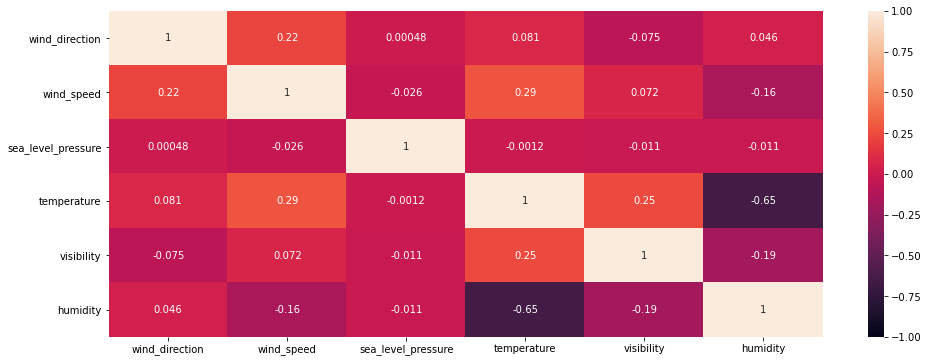

In [21]:
# Plot a heatmap to check for correlation (to see if there are any obvious linear relationships in our dataset)
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.drop(columns=df.columns[6:]).corr(), vmin=-1, vmax=1, annot=True)

In [22]:
# Standardize the features
from sklearn.preprocessing import StandardScaler #import standard scaler ->> justify why standardization over normalization
scaled_features = df.copy() # create a copy of the df
col_names = df.drop(columns=df.columns[6:]).columns # generate a list of column names for values to standardize
features = scaled_features[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
scaled_features.head() #df with scaled features -- i might drop year month day, depemds on the performance

,wind_direction,wind_speed,sea_level_pressure,temperature,visibility,humidity,year,month,day,hour,clouds_BKN,clouds_CLR,clouds_OBS,clouds_OVC,clouds_SCT
0,-0.127116,-0.895798,0.049255,0.904425,3.750513,0.023603,1978,9,14,3,1,0,0,0,0
1,-1.594893,-1.357585,0.096046,-0.841305,0.340049,1.525375,1978,10,2,15,0,0,0,1,0
2,1.707606,0.720453,0.002464,-0.841305,0.340049,0.418806,1978,10,25,21,1,0,0,0,0
3,1.707606,3.491170,0.031059,-0.841305,0.340049,0.418806,1978,10,26,0,0,0,0,1,0
4,-1.594893,-1.357585,0.080449,-0.841305,2.154126,1.051131,1978,11,13,15,1,0,0,0,0


In [23]:
# Create X and y dataframes
X = scaled_features.drop(columns=['temperature']).values
y = scaled_features.iloc[:, 3].values


## Modeling - Linear Regression Models


* 3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

In [24]:
# get the baseline of coefficients
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X, y)


LinearRegression()

In [25]:
linear_model.coef_

array([ 4.51346006e-02,  1.34973867e-01, -5.12827983e-03,  1.14638150e-01,
       -6.06192633e-01,  5.06017417e-03,  4.02468501e-02,  4.42985448e-04,
       -2.32755666e-02, -1.59326373e-01, -7.80306753e-01, -4.18386730e-01,
       -1.40813181e-01, -2.50323084e-01])

In [26]:
print(f"The R2 Score using the base features is: {linear_model.score(X, y)}")

The R2 Score using the base features is: 0.5197687938792886


In [27]:
# Examining which features had the 'greatest' effect on the model
pd.DataFrame(list(zip(scaled_features.drop(columns=['temperature']).columns, linear_model.coef_)))

,0,1
0,wind_direction,0.045135
1,wind_speed,0.134974
2,sea_level_pressure,-0.005128
3,visibility,0.114638
4,humidity,-0.606193
5,year,0.005060
6,month,0.040247
7,day,0.000443
8,hour,-0.023276
9,clouds_BKN,-0.159326


After making an initial model, let's try to see if a Lasso regression can confirm the most significant features + test out our model using training_test_split.

In [28]:
# Import Lasso and Standard Scaler
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Instantiate a lasso regressor: lasso and the parameters to be grid searched
lasso_params = {'alpha': [0.001, 0.01, 0.02, 0.024, 0.025, 0.026, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.085, 0.09, 0.1, 1]}
lasso = Lasso()

# Initiate the CV Grid
lasso_cv = GridSearchCV(lasso, lasso_params, cv = 5)
# Fit the regressor to the initiated CV Grid
lasso_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(lasso_cv.best_params_)) 
print("Best score is {}".format(lasso_cv.best_score_))



Tuned Logistic Regression Parameters: {'alpha': 0.08}
Best score is 0.4840166671366949


[ 0.          0.08014774 -0.          0.03105177 -0.51703855  0.00547148
  0.02733241  0.         -0.02983437  0.         -0.         -0.
 -0.         -0.        ]


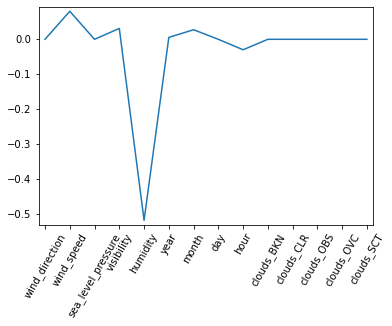

In [29]:
# Compute and print the coefficients
lasso_coef = lasso_cv.best_estimator_.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(scaled_features.drop(columns=['temperature']).columns)), lasso_coef)
plt.xticks(range(len(scaled_features.drop(columns=['temperature']).columns)), scaled_features.drop(columns=['temperature']).columns, rotation=60)
plt.margins(0.02)
plt.show()

#Confirms that humidity is the most relevant feature for predicting recorded ph temperatures using a linear regression model

Text(0.5, 1.0, 'Temperature x Humidity')

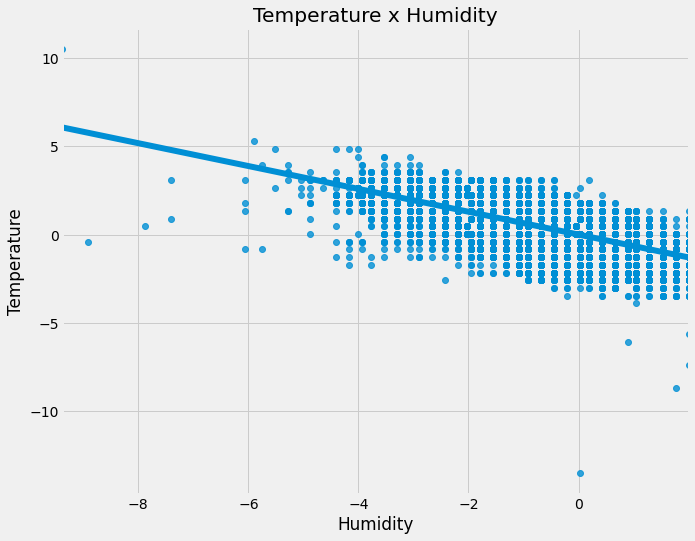

In [30]:
#Let's look at the relationship between the humidity variable and temperature via a scatter plot with a linear regression model fit

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

ax = sns.regplot(x="humidity", y="temperature", data=scaled_features)
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Temperature x Humidity")

In [31]:
pd.DataFrame(list(zip(scaled_features.drop(columns=['temperature']).columns, lasso_cv.best_estimator_.coef_)))

,0,1
0,wind_direction,0.000000
1,wind_speed,0.080148
2,sea_level_pressure,-0.000000
3,visibility,0.031052
4,humidity,-0.517039
5,year,0.005471
6,month,0.027332
7,day,0.000000
8,hour,-0.029834
9,clouds_BKN,0.000000


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
# Let's try to tune a Linear Regression model using train, test data
# OLS:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores   


array([0.51516356, 0.52473738, 0.51554144, 0.51794798, 0.52383031])

In [34]:
# number of features
len(scaled_features.drop(columns=['temperature']).columns)

14

In [35]:
#Let's try to "Hyperparameter tune" our model to choose the best combination of training features
# step-1: create a cross-validation scheme
from sklearn.feature_selection import RFE

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 15))}]

from sklearn.feature_selection import RFE
# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    9.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14]}],
             return_train_score=True, scoring='r2', verbose=1)

In [36]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.181315,0.012314,0.001197,0.000399,1,{'n_features_to_select': 1},-0.000132,-0.000023,-0.000081,0.000014,...,-0.000125,0.000148,14,0.000047,0.000004,0.000042,0.000003,0.000026,0.000024,0.000018
1,0.182512,0.027137,0.001197,0.000399,2,{'n_features_to_select': 2},0.414772,0.000036,0.413937,0.414789,...,0.248616,0.203165,13,0.420011,0.000009,0.420205,0.419972,0.000062,0.252052,0.205770
2,0.151714,0.012482,0.001396,0.000488,3,{'n_features_to_select': 3},0.414816,0.421926,0.414040,0.414883,...,0.418924,0.005775,12,0.420061,0.418276,0.420239,0.420009,0.416475,0.419012,0.001455
3,0.179120,0.031823,0.002194,0.000399,4,{'n_features_to_select': 4},0.451176,0.455962,0.446988,0.419346,...,0.446811,0.014469,11,0.453422,0.452225,0.454463,0.422722,0.451034,0.446773,0.012081
4,0.188098,0.027738,0.001993,0.000890,5,{'n_features_to_select': 5},0.452198,0.457076,0.448117,0.420112,...,0.447847,0.014603,10,0.454844,0.453624,0.455857,0.423389,0.452425,0.448028,0.012373
5,0.154387,0.010001,0.001397,0.000488,6,{'n_features_to_select': 6},0.467406,0.475166,0.449955,0.419970,...,0.458254,0.021565,9,0.471806,0.469855,0.458184,0.423442,0.468924,0.458442,0.018132
6,0.146809,0.010968,0.001395,0.000490,7,{'n_features_to_select': 7},0.467468,0.475266,0.449976,0.454291,...,0.466229,0.012734,8,0.471858,0.469897,0.458204,0.457096,0.474479,0.466307,0.007225
7,0.139626,0.018356,0.001596,0.000489,8,{'n_features_to_select': 8},0.467486,0.475265,0.464700,0.467985,...,0.471917,0.007042,7,0.471873,0.469917,0.472559,0.471706,0.474510,0.472113,0.001483
8,0.109507,0.008063,0.001596,0.000490,9,{'n_features_to_select': 9},0.472783,0.481359,0.470447,0.472934,...,0.476346,0.005405,6,0.477421,0.475265,0.477993,0.477337,0.474513,0.476506,0.001360
9,0.113696,0.012927,0.002194,0.000399,10,{'n_features_to_select': 10},0.492572,0.501196,0.490470,0.494028,...,0.496037,0.004653,5,0.497081,0.494912,0.497595,0.496677,0.494695,0.496192,0.001172


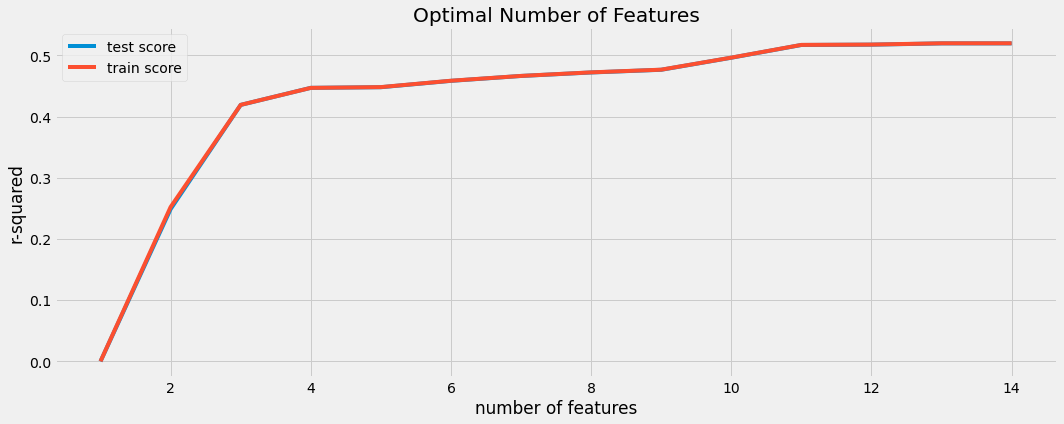

In [37]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

Examining the plot above, we can see that we could the highest test and training scores using all the features from the dataset. It is interesting to note that the steep increase in R2 stops at n=3. From n =11 onwards, we could drop the extraneous features if computation power is a concern of ours.

In [38]:
# Now we can get our final model.
import sklearn

# final model
n_features_optimal = 14

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred) #R2
mse = sklearn.metrics.mean_squared_error(y_test,y_pred) #mean squared error

print(f'mean squared error of predicted temp against actual temp: {mse}')
print(f'R^2 score of predicted temp against actual temp: {r2}')

mean squared error of predicted temp against actual temp: 0.48376106427281135
R^2 score of predicted temp against actual temp: 0.5202704612875507


In [39]:
pd.DataFrame(list(zip(scaled_features.drop(columns=['temperature']).columns, lm.coef_)))

,0,1
0,wind_direction,0.047681
1,wind_speed,0.133258
2,sea_level_pressure,-0.006151
3,visibility,0.114194
4,humidity,-0.608004
5,year,0.005029
6,month,0.040246
7,day,0.000535
8,hour,-0.023196
9,clouds_BKN,-0.126047


Text(0.5, 1.0, 'Temperature x Clear Clouds')

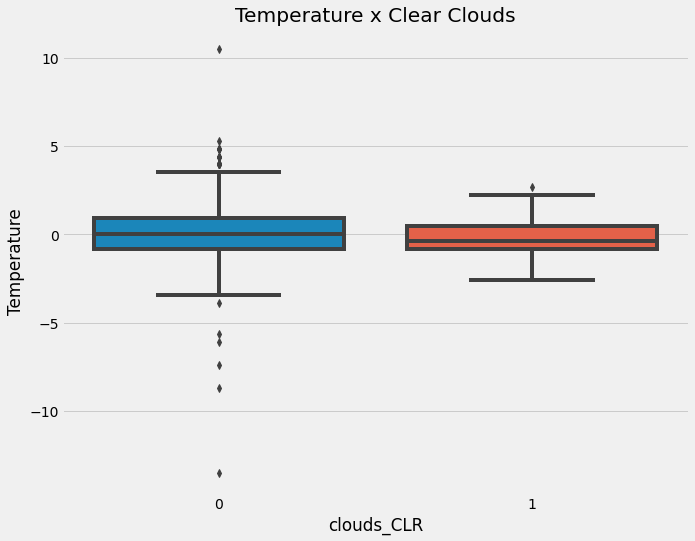

In [40]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

ax = sns.boxplot(x="clouds_CLR", y="temperature", data=scaled_features)
plt.xlabel("clouds_CLR")
plt.ylabel("Temperature")
plt.title("Temperature x Clear Clouds")

* What is the dimensionality or shape of the data? ( 1pt )

* What is mean temperature for the year 2017? ( 3pts )

* Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

Table above has the features and respective coefficients from the fitted model

* Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )

Surprisingly, clouds_CLR yielded the highest beta coefficient after optimizing a LinearRegression() model for the dataset. The figure above shows the scatter plot.

* Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )

MSE: 0.48376106427281135

* Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )

R^2 score:0.5202704612875507

* Identify if the model is a good model and why. ( 3pts )

Although I have standardized features and used Recursive Feature Elimination to figure out the best combination of features, there is still room for improvement by feature engineering the original time series features to see if we could get more meaningful features from them.

## Modeling with additional features - Seasonality

In [41]:
scaled_features.head()

,wind_direction,wind_speed,sea_level_pressure,temperature,visibility,humidity,year,month,day,hour,clouds_BKN,clouds_CLR,clouds_OBS,clouds_OVC,clouds_SCT
0,-0.127116,-0.895798,0.049255,0.904425,3.750513,0.023603,1978,9,14,3,1,0,0,0,0
1,-1.594893,-1.357585,0.096046,-0.841305,0.340049,1.525375,1978,10,2,15,0,0,0,1,0
2,1.707606,0.720453,0.002464,-0.841305,0.340049,0.418806,1978,10,25,21,1,0,0,0,0
3,1.707606,3.491170,0.031059,-0.841305,0.340049,0.418806,1978,10,26,0,0,0,0,1,0
4,-1.594893,-1.357585,0.080449,-0.841305,2.154126,1.051131,1978,11,13,15,1,0,0,0,0


In [42]:
df.columns

Index(['wind_direction', 'wind_speed', 'sea_level_pressure', 'temperature',
       'visibility', 'humidity', 'year', 'month', 'day', 'hour', 'clouds_BKN',
       'clouds_CLR', 'clouds_OBS', 'clouds_OVC', 'clouds_SCT'],
      dtype='object')

In [43]:
scaled_features['Date']=pd.to_datetime(scaled_features[['year','month','day','hour']])

In [44]:
scaled_features.head()

,wind_direction,wind_speed,sea_level_pressure,temperature,visibility,humidity,year,month,day,hour,clouds_BKN,clouds_CLR,clouds_OBS,clouds_OVC,clouds_SCT,Date
0,-0.127116,-0.895798,0.049255,0.904425,3.750513,0.023603,1978,9,14,3,1,0,0,0,0,1978-09-14 03:00:00
1,-1.594893,-1.357585,0.096046,-0.841305,0.340049,1.525375,1978,10,2,15,0,0,0,1,0,1978-10-02 15:00:00
2,1.707606,0.720453,0.002464,-0.841305,0.340049,0.418806,1978,10,25,21,1,0,0,0,0,1978-10-25 21:00:00
3,1.707606,3.491170,0.031059,-0.841305,0.340049,0.418806,1978,10,26,0,0,0,0,1,0,1978-10-26 00:00:00
4,-1.594893,-1.357585,0.080449,-0.841305,2.154126,1.051131,1978,11,13,15,1,0,0,0,0,1978-11-13 15:00:00


In [45]:
scaled_features[scaled_features['year'] == 2002].sort_values('Date')

,wind_direction,wind_speed,sea_level_pressure,temperature,visibility,humidity,year,month,day,hour,clouds_BKN,clouds_CLR,clouds_OBS,clouds_OVC,clouds_SCT,Date
44469,-1.411421,-0.895798,0.146735,-1.277738,0.340049,0.655928,2002,1,1,0,0,0,0,1,0,2002-01-01 00:00:00
44470,0.606773,0.258667,0.107743,0.467992,0.340049,-0.055438,2002,1,1,6,0,0,0,1,0,2002-01-01 06:00:00
44471,-1.227949,-0.895798,0.124640,-0.841305,-0.095330,0.181684,2002,1,1,18,0,0,0,1,0,2002-01-01 18:00:00
44472,0.606773,-0.895798,0.150635,-1.277738,-0.095330,1.051131,2002,1,2,0,0,0,0,1,0,2002-01-02 00:00:00
44473,-1.411421,0.720453,0.122040,0.467992,1.029398,-1.082966,2002,1,2,6,0,0,0,1,0,2002-01-02 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46868,0.606773,1.182239,0.085648,1.340857,0.340049,-0.213519,2002,12,31,6,1,0,0,0,0,2002-12-31 06:00:00
46869,-1.227949,0.720453,0.088247,-0.404873,-0.313019,0.655928,2002,12,31,9,0,0,0,1,0,2002-12-31 09:00:00
46870,1.707606,-0.434012,0.107743,-0.841305,-0.313019,0.893050,2002,12,31,12,0,0,0,1,0,2002-12-31 12:00:00
46871,-0.769268,-0.434012,0.119441,-0.404873,-0.530708,0.418806,2002,12,31,15,1,0,0,0,0,2002-12-31 15:00:00


In [46]:
# Feature engineering -> Rainy season (source: PAGASA website) 
# (1) the rainy season, from June to November; 
#(2) the dry season, from December to May.
# (a) the cool dry season, from December to February; 
#(b) the hot dry season, from March to May.

# June to November -> rainy season (6-12)
# December to February -> cool dry season (1-2)
# march to may -> hot dry season (3-5)


def label_season(row):
    if row['month'] in [1,2]:
        return "cool_dry_season"
    if row['month'] in [3,4,5]:
        return "hot_dry_season"
    if row['month'] in [6,7,8,9,10,11,12]:
        return "rainy_season"
        

In [47]:
scaled_features['season'] = scaled_features.apply(lambda row: label_season(row), axis=1)

In [48]:
scaled_features.head()

,wind_direction,wind_speed,sea_level_pressure,temperature,visibility,humidity,year,month,day,hour,clouds_BKN,clouds_CLR,clouds_OBS,clouds_OVC,clouds_SCT,Date,season
0,-0.127116,-0.895798,0.049255,0.904425,3.750513,0.023603,1978,9,14,3,1,0,0,0,0,1978-09-14 03:00:00,rainy_season
1,-1.594893,-1.357585,0.096046,-0.841305,0.340049,1.525375,1978,10,2,15,0,0,0,1,0,1978-10-02 15:00:00,rainy_season
2,1.707606,0.720453,0.002464,-0.841305,0.340049,0.418806,1978,10,25,21,1,0,0,0,0,1978-10-25 21:00:00,rainy_season
3,1.707606,3.491170,0.031059,-0.841305,0.340049,0.418806,1978,10,26,0,0,0,0,1,0,1978-10-26 00:00:00,rainy_season
4,-1.594893,-1.357585,0.080449,-0.841305,2.154126,1.051131,1978,11,13,15,1,0,0,0,0,1978-11-13 15:00:00,rainy_season


In [49]:
scaled_features = scaled_features.drop('Date', axis = 1)

In [50]:
scaled_features

,wind_direction,wind_speed,sea_level_pressure,temperature,visibility,humidity,year,month,day,hour,clouds_BKN,clouds_CLR,clouds_OBS,clouds_OVC,clouds_SCT,season
0,-0.127116,-0.895798,0.049255,0.904425,3.750513,0.023603,1978,9,14,3,1,0,0,0,0,rainy_season
1,-1.594893,-1.357585,0.096046,-0.841305,0.340049,1.525375,1978,10,2,15,0,0,0,1,0,rainy_season
2,1.707606,0.720453,0.002464,-0.841305,0.340049,0.418806,1978,10,25,21,1,0,0,0,0,rainy_season
3,1.707606,3.491170,0.031059,-0.841305,0.340049,0.418806,1978,10,26,0,0,0,0,1,0,rainy_season
4,-1.594893,-1.357585,0.080449,-0.841305,2.154126,1.051131,1978,11,13,15,1,0,0,0,0,rainy_season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90560,-1.594893,-1.357585,0.040157,0.031560,0.811709,0.418806,2018,9,1,9,1,0,0,0,0,rainy_season
90561,-0.952741,-0.434012,0.054454,0.031560,0.811709,0.893050,2018,9,1,12,1,0,0,0,0,rainy_season
90562,-0.952741,-0.434012,0.064852,-0.404873,0.811709,0.418806,2018,9,1,15,1,0,0,0,0,rainy_season
90563,1.524134,0.258667,0.051854,-0.404873,0.811709,0.181684,2018,9,1,18,1,0,0,0,0,rainy_season


In [51]:
scaled_features = pd.get_dummies(scaled_features, columns = ['season'])

In [52]:
scaled_features = scaled_features.drop('season_cool_dry_season', axis = 1)

In [53]:
scaled_features.columns

Index(['wind_direction', 'wind_speed', 'sea_level_pressure', 'temperature',
       'visibility', 'humidity', 'year', 'month', 'day', 'hour', 'clouds_BKN',
       'clouds_CLR', 'clouds_OBS', 'clouds_OVC', 'clouds_SCT',
       'season_hot_dry_season', 'season_rainy_season'],
      dtype='object')

In [54]:
# Create X and y dataframes
X = scaled_features.drop(columns=['temperature']).values
y = scaled_features.iloc[:, 3].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [56]:
lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores   


array([0.61955636, 0.63425865, 0.62863787, 0.62321393, 0.63124939])

In [57]:
# number of features
len(scaled_features.drop(columns=['temperature']).columns)

16

In [58]:
#Let's try to "Hyperparameter tune" our model to choose the best combination of training features
# step-1: create a cross-validation scheme
from sklearn.feature_selection import RFE

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 17))}]

from sklearn.feature_selection import RFE
# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   13.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15,
                                                   16]}],
             return_train_score=True, scoring='r2', verbose=1)

In [59]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.236568,0.011149,0.001397,0.000489,1,{'n_features_to_select': 1},0.080161,0.083111,0.081037,0.072289,...,0.081058,0.005295,16,0.081475,0.080749,0.081269,0.083396,0.079272,0.081232,0.001328
1,0.246542,0.018349,0.001994,0.000631,2,{'n_features_to_select': 2},0.116155,0.118818,0.118362,0.105513,...,0.115649,0.005185,15,0.115749,0.115107,0.115225,0.118366,0.114880,0.115866,0.001282
2,0.243549,0.033199,0.001596,0.000488,3,{'n_features_to_select': 3},0.530788,0.118883,0.118281,0.532586,...,0.368276,0.203903,14,0.539064,0.115211,0.115361,0.538587,0.536513,0.368947,0.207115
3,0.228390,0.013034,0.001795,0.000399,4,{'n_features_to_select': 4},0.531169,0.543688,0.538396,0.533325,...,0.537480,0.004640,13,0.539448,0.536298,0.537635,0.538875,0.536558,0.537763,0.001240
4,0.235570,0.032171,0.001796,0.000399,5,{'n_features_to_select': 5},0.531223,0.543691,0.538399,0.533411,...,0.537666,0.004732,12,0.539476,0.536340,0.537676,0.538893,0.536835,0.537844,0.001189
5,0.204057,0.019511,0.002193,0.000400,6,{'n_features_to_select': 6},0.555664,0.565270,0.558520,0.556753,...,0.559812,0.003667,11,0.561040,0.558627,0.560330,0.560749,0.559211,0.559991,0.000923
6,0.184108,0.012935,0.001795,0.000399,7,{'n_features_to_select': 7},0.556163,0.565851,0.559180,0.557866,...,0.560550,0.003642,10,0.561849,0.559415,0.561099,0.561402,0.559935,0.560740,0.000917
7,0.173935,0.009496,0.001802,0.000758,8,{'n_features_to_select': 8},0.568583,0.568552,0.562096,0.561204,...,0.567765,0.006154,9,0.576189,0.562565,0.564195,0.564393,0.573701,0.568208,0.005592
8,0.165358,0.010896,0.002594,0.000798,9,{'n_features_to_select': 9},0.590551,0.568539,0.562100,0.561176,...,0.576804,0.016341,8,0.599785,0.562585,0.564211,0.564416,0.596974,0.577594,0.017006
9,0.145422,0.009368,0.002192,0.000748,10,{'n_features_to_select': 10},0.590747,0.581419,0.572193,0.571863,...,0.584881,0.013565,7,0.599872,0.573023,0.575358,0.575418,0.603000,0.585334,0.013213


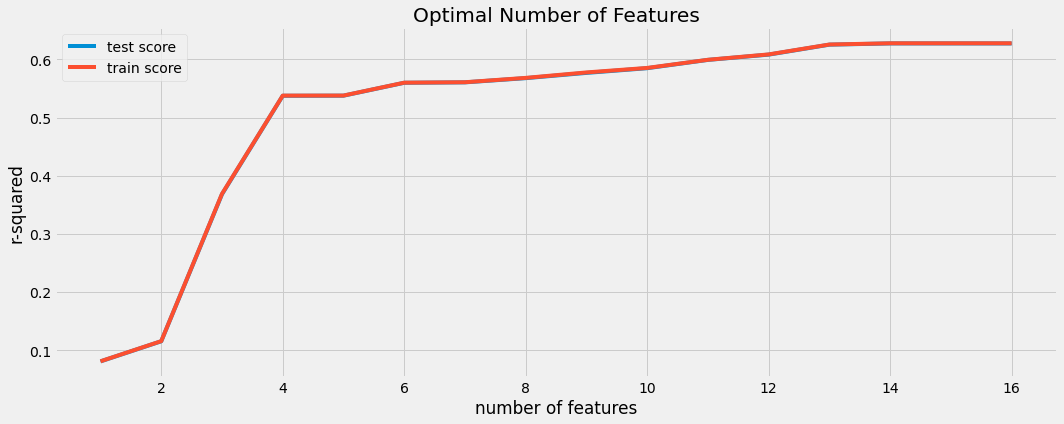

In [60]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [61]:
# Now we can get our final model.
import sklearn

# final model
n_features_optimal = 14

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred) #R2
mse = sklearn.metrics.mean_squared_error(y_test,y_pred) #mean squared error

print(f'mean squared error of predicted temp against actual temp: {mse}')
print(f'R^2 score of predicted temp against actual temp: {r2}')

mean squared error of predicted temp against actual temp: 0.37497884544849286
R^2 score of predicted temp against actual temp: 0.6281461203903621


In [62]:
pd.DataFrame(list(zip(scaled_features.drop(columns=['temperature']).columns, lm.coef_)))

,0,1
0,wind_direction,0.051765
1,wind_speed,0.090646
2,sea_level_pressure,-0.001445
3,visibility,0.096563
4,humidity,-0.636777
5,year,0.004535
6,month,-0.094826
7,day,-0.000142
8,hour,-0.023453
9,clouds_BKN,-0.074125


Text(0.5, 1.0, 'Temperature x seasonality')

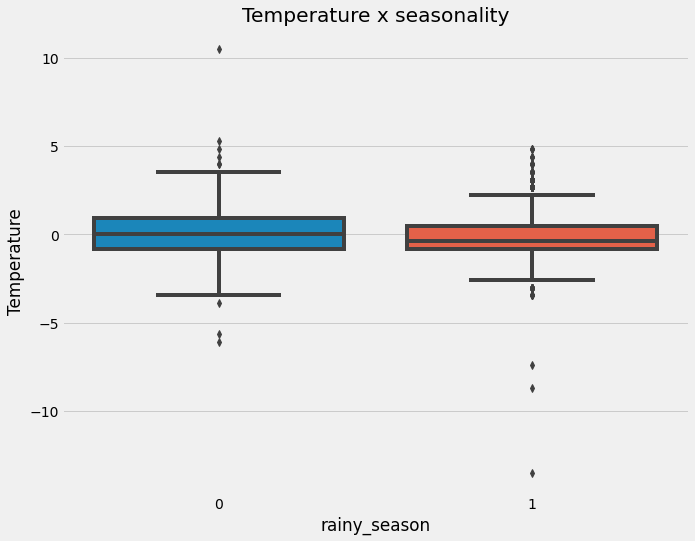

In [63]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

ax = sns.boxplot(x="season_rainy_season", y="temperature", data=scaled_features)
plt.xlabel("rainy_season")
plt.ylabel("Temperature")
plt.title("Temperature x seasonality")

In [64]:
# The R2 and MSE improved! Other features I want to check out is checking if we can Feature Engineer El Nino and La Nina dates and maybe incorporate 
# window statistics. However, I think that is out of scope from this lesson.

* What is the dimensionality or shape of the data? ( 1pt )
(90565, 11)

* What is mean temperature for the year 2017? ( 3pts )
27.93335635359116

* Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

Table above has the features and respective coefficients from the fitted model

* Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )

Surprisingly, seasonality yielded the highest beta coefficient after optimizing a LinearRegression() model for the dataset. The figure above shows the scatter plot.

* Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )

MSE:0.37497884544849286

* Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )

R^2 score:0.6281461203903621

* Identify if the model is a good model and why. ( 3pts )

Although I have standardized features and used Recursive Feature Elimination to figure out the best combination of features, there is still room for improvement by feature engineering the original time series features to see if we could get more meaningful features from them. Objectively, I guess with the current limited domain knowledge we have re: climate science and the limitations of this dataset, the model we got is a "good" fit for the current data.